# 【課題】統計基礎用語の説明

## 1. 標準偏差について、分散との違いや関係性、どんな時に使う指標なのかをお答えください。
標準偏差とは、あるデータ群がその平均値からどの程度ばらついているかを表す指標の１つとして用いる。 
データは平均値に対して正負の方向に分布するため、そのばらつきを表すのに平均値からの差分の２乗平均を計算する。これを分散と呼ぶ。 
標準偏差は、ばらつきを表すのにそのデータと単位系を合わせるため分散の平方根として計算される。


## 2. 共分散行列について述べてください。
２変数X,Yからなるデータ群がある時、共分散行列V[X,Y]は以下のように定義される  

$$
    \boldsymbol{V[X,Y]} =
        \left[\begin{array}{c}
            V[X] & Cov[X,Y] \\
            Cov[Y,X] & V[Y] \\
        \end{array}\right]
$$

V[X]、V[Y]はそれぞれX,Yの分散を表す。Cov[X,Y],Cov[Y,X]はXとYの共分散を表す。  
X,Yの共分散Cov[X,Y] (Cov[Y,X])は以下のように定義される。
$$
    Cov[X,Y] = \frac{1}{n}\sum_{i=0}^{n}(\bar{x}-x_{n})(\bar{y}-y_{n})
$$


## 3. 1次元の正規分布と多次元の正規分布について述べてください。特にどういう時に使うのかについてお答えください。
### １次元の正規分布について
確率変数xが正規分布に従う時その分布は以下の式で表される。
$$
    N(\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{(x-\mu_{n})^2}{2\sigma_{x}^2})
$$

μはxの平均値、σ2はxの分散である。分布の-∞~+∞に渡る積分値は1に規格化される。特に平均値μを0、分散σ2を1とした場合を標準正規分布と呼ぶ
式から分かるように確率変数xの平均値と分散がわかれば分布の形を求めることができ、任意のxに対して発生確率を求めることができる。また全体の何%があるxより内側（または外側）にあるか知ることができる。例えばX=σの場合は全体の68%、x=2σの場合は全体の95%、x=3σの場合は99.7%がxより内側に含まれる。


### 多次元の正規分布について
それぞれ独立な正規分布に従う確率変数$x_{i}$ (i=1,2,3...N)がある時、分布P($x_{i}$)を多次元の正規分布と呼ぶ。  
分布P($x_{i}$)は$x_{1}$~$x_{N}$の分布の積として表される。
例えば、あるクラスにおいて数学と国語のテストの得点の分布がそれぞれ正規分布に従う時、確率変数(数学の得点、国語の得点)は２次元の正規分布である。


In [124]:
"""
【課題】データ点の作成
2次元正規分布を用いて、中心(平均)が(-3,0)と(0,-3)、共分散行列が以下で表現される確率分布から生成されるデータ点を500個ずつ作成せよ。
その際、片方の500個のデータにはdata1、もう片方の500個のデータにはdata2と名付けて作成せよ。
"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mat_mu1 = [-3,0]
mat_mu2 = [0,-3]
mat_cov = [[1.0, 0.8], [0.8, 1.0]]

data1 = np.random.multivariate_normal(mat_mu1, mat_cov, 500)
data2 = np.random.multivariate_normal(mat_mu2, mat_cov, 500)

"""
sns.jointplot(data1[:,0], data1[:,1])
plt.show()

sns.jointplot(data2[:,0], data2[:,1])
plt.show()
"""

'\nsns.jointplot(data1[:,0], data1[:,1])\nplt.show()\n\nsns.jointplot(data2[:,0], data2[:,1])\nplt.show()\n'

In [125]:
"""
データ点へのラベル付け
"""
all_data = np.concatenate([data1, data2], axis=0)
label = np.array([0 if i < 500 else 1 for i in range(1000)])
#print(label.reshape(len(label),1))
all_data_w_label = np.append(all_data, label.reshape(len(label),1), axis=1)
#np.append(all_data, np.reshape(label,(len(label),1)), axis=1)
#print(all_data_w_label)

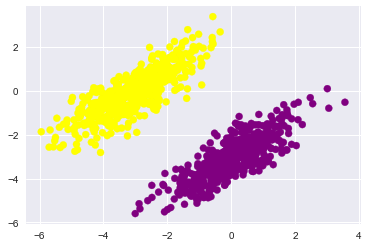

In [126]:
"""
正しくラベル付けされているか見てみる
"""
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

my_cmap = ListedColormap(['yellow','purple'])
plt.scatter(all_data_w_label[:,0:1], all_data_w_label[:,1:2], s=50, c=all_data_w_label[:,2:3], cmap=my_cmap, marker='o')
#plt.scatter(all_data_w_label[:,0:1], all_data_w_label[:,1:2], s=50,  marker='o')
#plt.scatter(all_data_w_label[:,0:1], all_data_w_label[:,1:2], s=50, c=all_data_w_label[:,0:1], cmap='Blues', marker='o')

plt.show()